In [2]:
library(repr)
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=4)
library(xtable)
library(latex2exp)

Warning message:
“package ‘repr’ was built under R version 3.4.4”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘xtable’ was built under R version 3.4.4”

# Training curves for different and same hyperparameters

In [69]:
mnist.cnn <- read.csv("./mnistcnn/mnist_complete.csv", header = T)
intermediate <- mnist.cnn[mnist.cnn$Status == "INTERMEDIATE",]

In [83]:
df <- aggregate(Objective~lr+Trial.ID, intermediate, FUN = list)

In [93]:
# aggregate(Objective~lr+Trial.ID, intermediate, FUN = min)

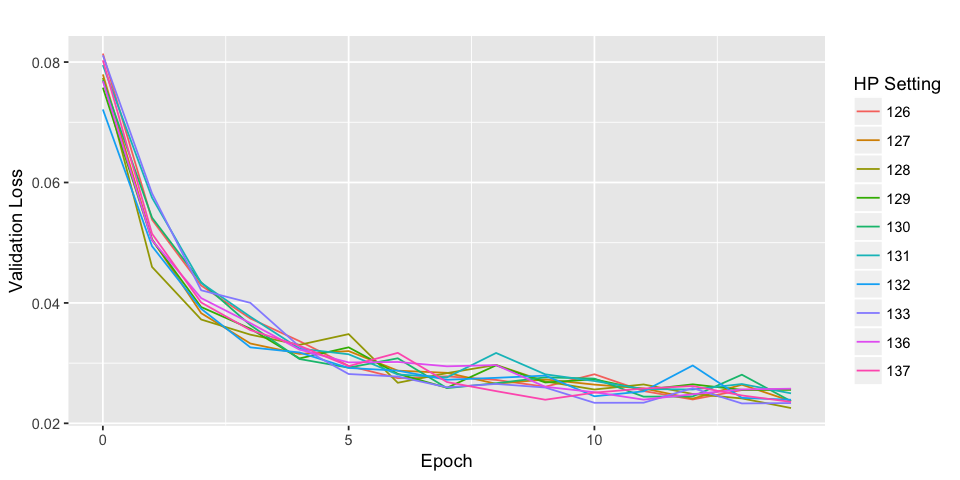

In [106]:
num.curves <- 10
grp <- 6
df <- intermediate[intermediate$lr==unique(intermediate$lr)[grp],]
df <- df[df$Trial.ID %in% unique(df$Trial.ID)[1:num.curves],]
p <- ggplot(df, aes(x=Iteration, y=Objective, group=factor(Trial.ID), color=factor(Trial.ID))) + geom_line() +  labs(title = "", x = "Epoch", y = "Validation Loss", color = "HP Setting")
p
# ggsave("figures/curves-different-hp.pdf", plot=p, width=5, height=4)

In [5]:
f <- function(x, sd=5){
    y <- (x-3)^2 + 10
    if(sd==0){
        return(y)
    }else{
        return(y + rnorm(length(x), mean=0, sd=sd))
    }
}

f.params <- function(x, sd=5, location=3, scale=1, offset=10){
    y <- scale*(x-location)^2 + offset
    if(sd==0){
        return(y)
    }else{
        return(y + rnorm(length(x), mean=0, sd=sd))
    }
}

g <- function(x){
    4*exp(-((x-4.)^2)/4.)*cos(1.5*(x-4.))^2
}

In [ ]:
num.runs <- 1000
xstar <- rep(NA, num.runs)
ystar.observed <- rep(NA, num.runs)
ystar.expected <- rep(NA, num.runs)
for(i in 1:num.runs) {
    xnew <- seq(1, rlim-1, 0.5)
    ynew <- f(xnew, sd=2)

    xstar[i] <- xnew[which.min(ynew)]
    ystar.observed[i] <- min(ynew)
    ystar.expected[i] <- f(xstar[i], sd=0)
}


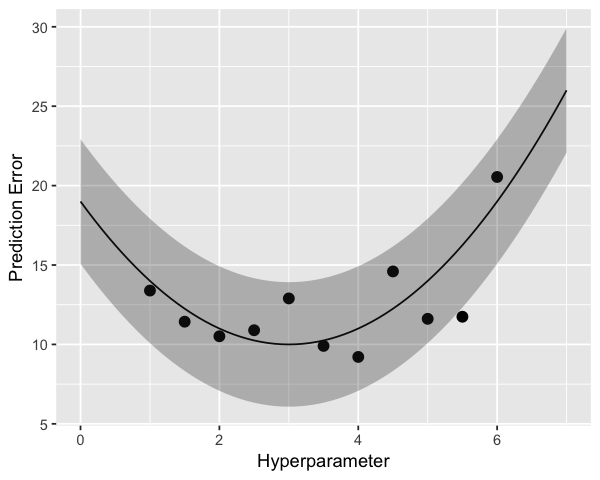

In [380]:
function.df <- data.frame(x=seq(0, rlim, 0.1), y=f(x, sd=0), lwr=f(x, sd=0)-1.96*2, upr=f(x, sd=0)+1.96*2)

p <- ggplot(points.df, aes(x=x, y=y))+
    labs(x="Hyperparameter", y = "Prediction Error")+
    geom_point(aes(shape = factor(run)), size=3)+
    geom_line(data=function.df)+
    geom_ribbon(data=function.df,aes(ymin=lwr,ymax=upr),alpha=0.3)+
    theme(legend.position="none")
p

In [381]:
ggsave("figures/parabola-1.pdf", plot=p, width=5, height=4)

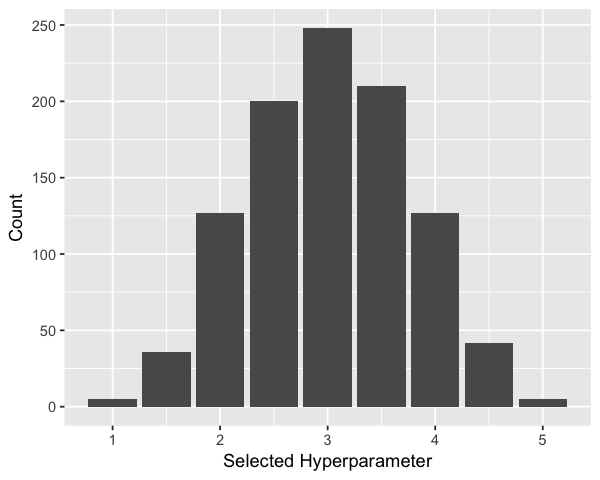

In [233]:
barchart.df <- data.frame(xstar, ystar.observed, ystar.expected)
p <- ggplot(barchart.df, aes(x=xstar)) + geom_bar() + labs(x="Selected Hyperparameter", y = "Count")
p
ggsave("figures/parabola-1-barchart.pdf", plot=p, width=5, height=4)

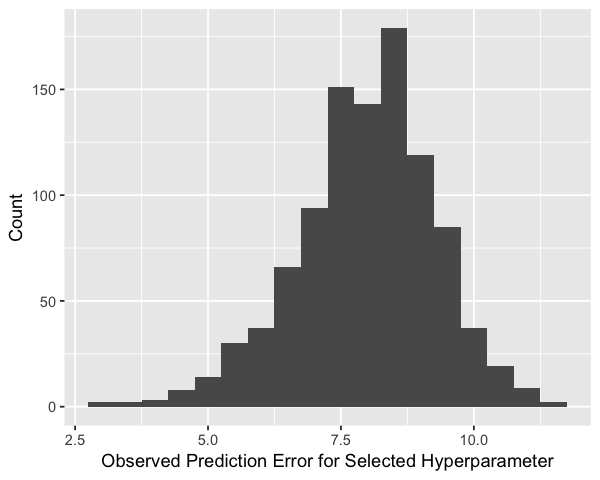

In [232]:
obs.df <- data.frame(ystar.observed)
p <- ggplot(obs.df, aes(x=ystar.observed)) + 
labs(x="Observed Prediction Error for Selected Hyperparameter", y = "Count")+
  geom_histogram(binwidth=0.5)
p
ggsave("figures/parabola-1-observed.pdf", plot=p, width=5, height=4)

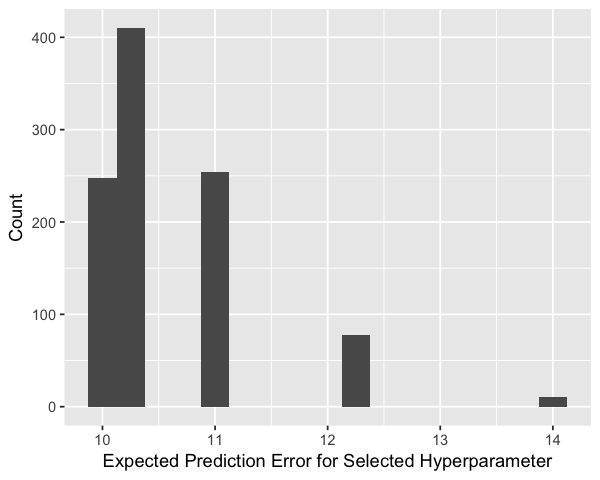

In [230]:
exp.df <- data.frame(ystar.expected)
p <- ggplot(obs.df, aes(x=ystar.expected)) + 
labs(x="Expected Prediction Error for Selected Hyperparameter", y = "Count")+
  geom_histogram(binwidth=0.25)
p
ggsave("figures/parabola-1-expected.pdf", plot=p, width=5, height=4)

# Experimental Type I Error

* Truth: Psi(A) = Psi(B)
* Observed: Psi(A) < Psi(B)

In [56]:
rlim <- 12

# A parameters
loc.A <- 4
scale.A <- 0.5
offset.A <- 10

# B parameters
loc.B <- 10
scale.B <- 0.5
offset.B <- 10

sigma <- 1.
n.post.trials <- 10

x <- seq(0, rlim, 0.1)
xnew <- seq(0, rlim, 2)

In [61]:
fp <- 0
for(i in 1:1000){
    ynew1 <- f.params(xnew, sd=sigma, location=loc.A, scale=scale.A, offset=offset.A)
    ynew2 <- f.params(xnew, sd=sigma, location=loc.B, scale=scale.B, offset=offset.B)

    y1.exp <- f.params(xnew[which.min(ynew1)], sd=0, location=loc.A, scale=scale.A, offset=offset.A)
    y2.exp <- f.params(xnew[which.min(ynew2)], sd=0, location=loc.B, scale=scale.B, offset=offset.B)
    
    if((min(y1.exp, y2.exp)+1.96*sigma/sqrt(n.post.trials-1) < max(y1.exp, y2.exp)-1.96*sigma/sqrt(n.post.trials-1))){
        fp <- fp+1
    }
}
fp/1000

[1] 0.25

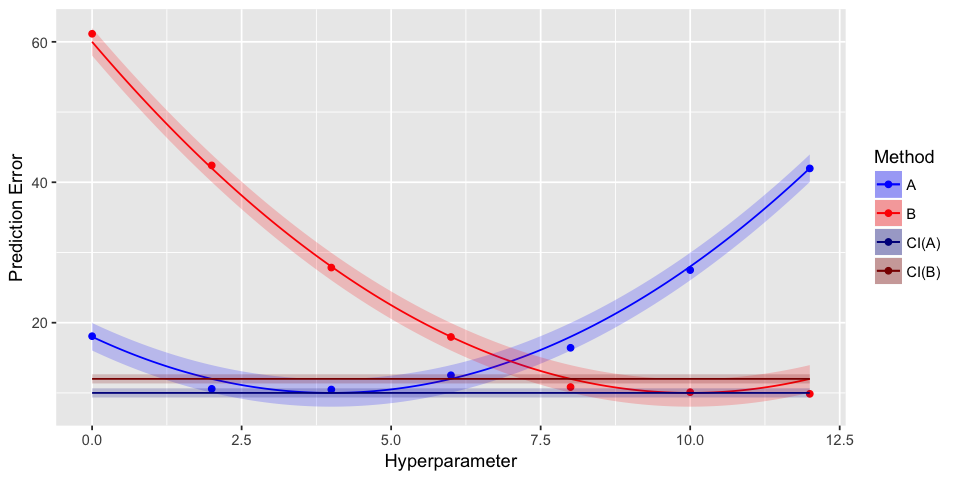

In [62]:
y1.exp <- rep(0, length(x))
y2.exp <- rep(0, length(x))
while(!(min(y1.exp, y2.exp)+1.96*sigma/sqrt(n.post.trials-1) < max(y1.exp, y2.exp)-1.96*sigma/sqrt(n.post.trials-1))) {
    ynew1 <- f.params(xnew, sd=sigma, location=loc.A, scale=scale.A, offset=offset.A)
    ynew2 <- f.params(xnew, sd=sigma, location=loc.B, scale=scale.B, offset=offset.B)

    y1.exp <- f.params(xnew[which.min(ynew1)], sd=0, location=loc.A, scale=scale.A, offset=offset.A)
    y2.exp <- f.params(xnew[which.min(ynew2)], sd=0, location=loc.B, scale=scale.B, offset=offset.B)
}

y1 <- f.params(x, sd=0, location=loc.A, scale=scale.A, offset=offset.A)
y2 <- f.params(x, sd=0, location=loc.B, scale=scale.B, offset=offset.B)

function.df <- data.frame(x=c(x, x),
                          y=c(y1, y2),
                          lwr=c(y1, y2)-1.96*sigma,
                          upr=c(y1, y2)+1.96*sigma,
                          method=c(rep("A", length(y1)), rep("B", length(y1))))

ymean <- c(rep(f.params(xnew[which.min(ynew1)], sd=0, location=loc.A, scale=scale.A, offset=offset.A), length(xnew)),
           rep(f.params(xnew[which.min(ynew2)], sd=0, location=loc.B, scale=scale.B, offset=offset.B), length(xnew)))
ci.df <- data.frame(x=c(xnew, xnew),
                        y=ymean,
                        lwr=ymean-1.96*sigma/sqrt(n.post.trials-1),
                        upr=ymean+1.96*sigma/sqrt(n.post.trials-1),
                        method=c(rep("CI(A)", length(ynew1)), rep("CI(B)", length(ynew2))))

points.df <- data.frame(x=c(xnew, xnew), y=c(ynew1, ynew2), method=c(rep("A", length(ynew1)), rep("B", length(ynew2))))
p <- ggplot(points.df, aes(x=x, y=y, color=method, fill=method))+
    geom_point()+
    geom_line(data=function.df) + 
    geom_ribbon(data=function.df,aes(ymin=lwr,ymax=upr),alpha=0.2, colour=NA)+
    labs(x="Hyperparameter", y = "Prediction Error")+
    scale_color_manual("Method", values=c('blue', 'red', 'darkblue', 'darkred')) +
    scale_fill_manual("Method", values=c('blue', 'red', 'darkblue', 'darkred')) +
    geom_line(data=ci.df) + 
    geom_ribbon(data=ci.df,aes(ymin=lwr,ymax=upr),alpha=0.2,color=NA)
p
# ggsave("figures/parabola-2-ci.pdf", plot=p, width=5, height=4)